In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

plt.style.use('seaborn')

# Nursing Home Data

## Загружаем данные

In [2]:
df = pd.read_csv("./Nursing Home Data_data", sep='\s+')
X = df.to_numpy()
df.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


In [3]:
df.describe()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,93.269231,183.865385,280.173077,14210.134615,3812.826923,2847.538462,0.653846
std,40.852732,87.029639,120.847128,6973.756475,1659.481076,1949.029034,0.480384
min,25.000000,48.000000,83.000000,2853.000000,1288.000000,137.000000,0.000000
25%,62.000000,125.250000,198.000000,8857.000000,2336.500000,1229.250000,0.000000
50%,88.000000,164.500000,279.000000,12384.000000,3696.000000,2377.500000,1.000000
75%,120.000000,229.000000,363.750000,18777.250000,4840.000000,4443.750000,1.000000
max,244.000000,514.000000,776.000000,36029.000000,7489.000000,6442.000000,1.000000


In [4]:
suburban_nsal = df[df['RURAL'] == 1]['NSAL']
city_nsal = df[df['RURAL'] == 0]['NSAL']
suburban_nsal.name, city_nsal.name = 'suburban', 'city'

## Построим гистограмму

In [5]:
def two_histograms(x, y):
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x), bins=10)
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y), bins=10)
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

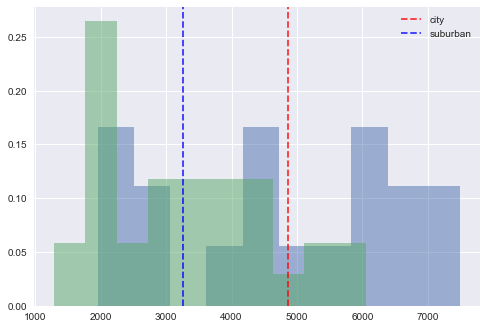

In [6]:
two_histograms(city_nsal, suburban_nsal)

## Проверим распределение на нормальность

Для проверки гипотезы о нормальности распределения воспользуемся **критерием Шапиро-Уилка:**

In [7]:
round(stats.shapiro(city_nsal)[1], 3)

0.267

In [8]:
round(stats.shapiro(suburban_nsal)[1], 3)

0.072

Из полученных данных видно, что нулевая гипотеза о принадлежности нормальному распределению **не отвергается** (считаем уровень значимости $\alpha = 0.05$).

Поскольку в двух выборках находятся разные объекты, можем сделать вывод, что выборки независимые. Следовательно, будем пользоваться **критерием Стьюдента:**

In [10]:
res = stats.ttest_ind(city_nsal, suburban_nsal, equal_var=True)
print('p-value 1:', round(res[1]/2, 4))
print('p-value 2:', round(res[1], 4))

p-value 1: 0.0003
p-value 2: 0.0005


Заметим, что значение p-value для одностороннего и для двустороннего теста меньше уровня значимости $\Rightarrow$ **можем отвергнуть нулевую гипотезу**.

Построим ящиковую диаграмму:

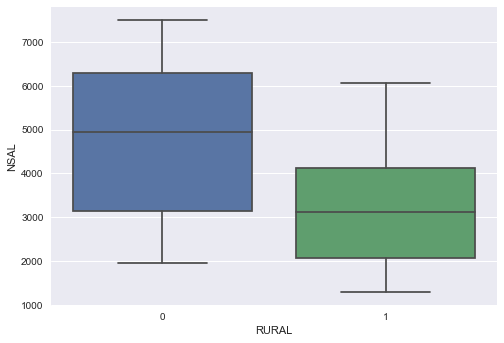

In [11]:
sns.boxplot(x='RURAL', y="NSAL", data=df)
plt.show()

**Вывод:** средняя зарплата медсестры городской больницы выше, чем у медсестры загородной больницы.

# Unions and State Labor Law

## Загружаем данные

In [12]:
df = pd.read_csv("./Unions and State Labor Law_data", sep='\t')
X = df.to_numpy()
df.head()

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


In [13]:
df.describe()

,DENS,COMP,RTW,PVT
count,50.000000,50.000000,50.000000,50.000000
mean,33.320000,0.540000,0.400000,16.050000
std,11.506343,0.503457,0.494872,7.831263
min,13.400000,0.000000,0.000000,3.900000
25%,25.175000,0.000000,0.000000,9.950000
50%,31.850000,1.000000,0.000000,14.150000
75%,40.650000,1.000000,1.000000,22.875000
max,61.100000,1.000000,1.000000,33.100000


In [15]:
comp = df[df['COMP'] == 1]['DENS']
not_comp = df[df['COMP'] == 0]['DENS']
comp.name, not_comp.name = 'COMP', 'NOT COMP'

## Построим гистограмму

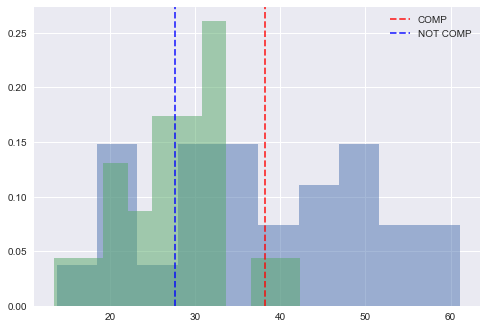

In [16]:
two_histograms(comp, not_comp)

## Проверим распределение на нормальность

Воспользуемся **критерием Шапиро-Уилка** для проверки гипотезы о нормальности распределения:

In [17]:
round(stats.shapiro(comp)[1], 3)

0.74

In [18]:
round(stats.shapiro(not_comp)[1], 3)

0.943

Видно, что нулевая гипотеза о принадлежности нормальному распределению **не отвергается**. 

Поскольку в двух выборках находятся разные объекты, можем сделать вывод, что выборки независимые. Следовательно, будем пользоваться **критерием Стьюдента:**

In [19]:
res = stats.ttest_ind(comp, not_comp, equal_var=False)
print('p-value 1:', round(res[1]/2, 4))
print('p-value 2:', round(res[1], 4))

p-value 1: 0.0003
p-value 2: 0.0006


Заметим, что значение p-value для одностороннего и для двустороннего теста меньше уровня значимости $\Rightarrow$ **можем отвергнуть нулевую гипотезу**.

Построим ящиковую диаграмму:

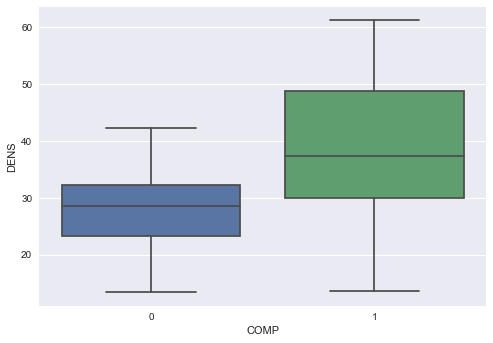

In [20]:
sns.boxplot(x='COMP', y="DENS", data=df)
plt.show()

**Вывод:** средний процент муниципальных служащих, состоящих в профсоюзах в 1982 году больше в штатах, в которых действует закон *State bargaining laws*.